In [1]:
# Import necessary libraries

In [116]:
import pandas as pd
import numpy as np

In [117]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [118]:
from sklearn.model_selection import train_test_split 

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [120]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [121]:
# Load the breast cancer dataset

In [122]:
dataset=pd.read_csv('./Breast_Cancer.csv')

In [123]:
# Familiarise the breast cancer dataset

In [124]:
dataset.head(126)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,43,White,Divorced,T4,N1,IIIB,Poorly differentiated,3,Regional,35,Positive,Positive,15,3,79,Alive
122,50,White,Single,T2,N3,IIIC,Moderately differentiated,2,Regional,50,Positive,Positive,16,16,62,Alive
123,59,White,Divorced,T2,N2,IIIA,Poorly differentiated,3,Regional,38,Positive,Positive,23,4,86,Alive
124,53,Other,Married,T1,N1,IIA,Well differentiated,1,Regional,15,Positive,Positive,23,2,49,Alive


In [125]:
dataset.shape

(4024, 16)

In [126]:
dataset.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [127]:
dataset.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [128]:
dataset.duplicated().sum()

1

In [129]:
dataset.drop_duplicates(inplace=True)

In [130]:
dataset.duplicated().sum()

0

In [131]:
dataset.shape

(4023, 16)

In [132]:
# drop the unwanted columns

In [133]:
dataset.drop(columns=['Age','Race','Marital Status'],inplace=True)

In [134]:
dataset.head(3)

,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive


In [135]:
dataset.dtypes

T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [136]:
#encoding the categorical columns

In [137]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
le7=LabelEncoder()
le8=LabelEncoder()
le9=LabelEncoder()

In [138]:
dataset['differentiate']=le4.fit_transform(dataset['differentiate'])
dataset['T Stage ']=le1.fit_transform(dataset['T Stage '])
dataset['A Stage']=le6.fit_transform(dataset['A Stage'])
dataset['Estrogen Status']=le7.fit_transform(dataset['Estrogen Status'])
dataset['Progesterone Status']=le8.fit_transform(dataset['Progesterone Status'])
dataset['N Stage']=le2.fit_transform(dataset['N Stage'])
dataset['6th Stage']=le3.fit_transform(dataset['6th Stage'])
dataset['Status']=le9.fit_transform(dataset['Status'])
dataset['Grade']=le5.fit_transform(dataset['Grade'])

In [139]:
dataset

,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,0,0,0,1,3,1,4,1,1,24,1,60,0
1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,2,2,4,0,2,1,63,1,1,14,7,75,0
3,0,0,0,1,3,1,18,1,1,2,1,84,0
4,1,0,1,1,3,1,41,1,1,3,1,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,0,0,0,0,2,1,9,1,1,1,1,49,0
4020,1,1,2,0,2,1,46,1,1,14,8,69,0
4021,1,0,1,0,2,1,22,1,0,11,3,69,0
4022,1,0,1,0,2,1,44,1,1,11,1,72,0


In [140]:
dataset.dtypes

T Stage                   int32
N Stage                   int32
6th Stage                 int32
differentiate             int32
Grade                     int32
A Stage                   int32
Tumor Size                int64
Estrogen Status           int32
Progesterone Status       int32
Regional Node Examined    int64
Reginol Node Positive     int64
Survival Months           int64
Status                    int32
dtype: object

In [141]:
dataset.columns

Index(['T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage',
       'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',
       'Status'],
      dtype='object')

In [142]:
dataset

,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,0,0,0,1,3,1,4,1,1,24,1,60,0
1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,2,2,4,0,2,1,63,1,1,14,7,75,0
3,0,0,0,1,3,1,18,1,1,2,1,84,0
4,1,0,1,1,3,1,41,1,1,3,1,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,0,0,0,0,2,1,9,1,1,1,1,49,0
4020,1,1,2,0,2,1,46,1,1,14,8,69,0
4021,1,0,1,0,2,1,22,1,0,11,3,69,0
4022,1,0,1,0,2,1,44,1,1,11,1,72,0


In [143]:
dataset.describe()

,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,0.784986,0.438479,1.322148,0.690529,2.131742,0.977131,30.477007,0.933134,0.826498,14.358439,4.158837,71.301765,0.153120
std,0.765526,0.693531,1.266610,1.016486,0.642475,0.149503,21.121253,0.249820,0.378728,8.100241,5.109724,22.923009,0.360147
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,16.000000,1.000000,1.000000,9.000000,1.000000,56.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,25.000000,1.000000,1.000000,14.000000,2.000000,73.000000,0.000000
75%,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,19.000000,5.000000,90.000000,0.000000
max,3.000000,2.000000,4.000000,3.000000,3.000000,1.000000,140.000000,1.000000,1.000000,61.000000,46.000000,107.000000,1.000000


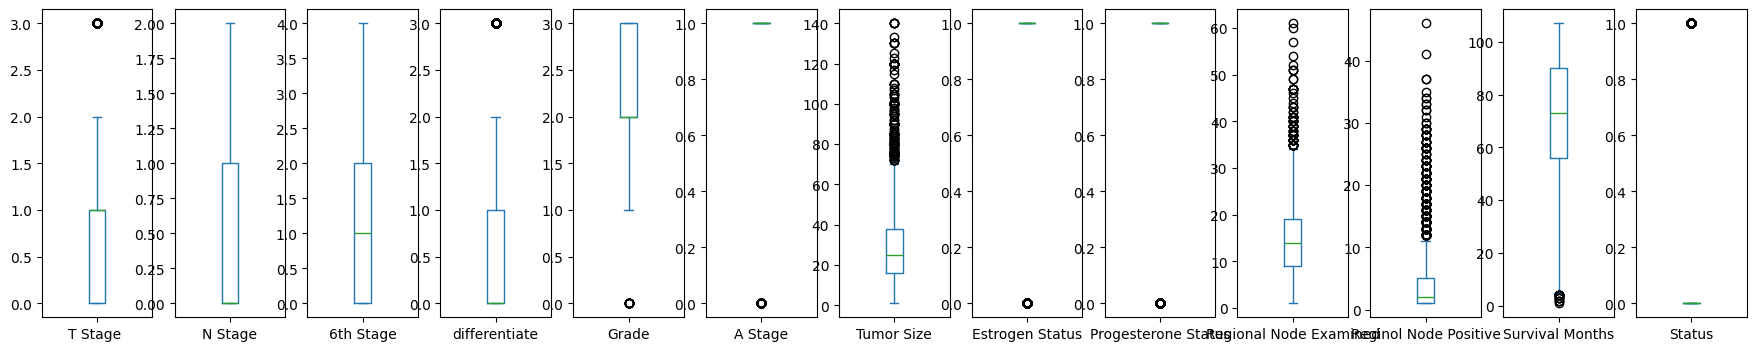

In [144]:
dataset.plot.box(figsize=(22,4),subplots=True);

In [145]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = dataset['Tumor Size'].quantile(0.25)
Q3 = dataset['Tumor Size'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
dataset['Tumor Size'] = np.where((dataset['Tumor Size'] < lower_bound) | (dataset['Tumor Size'] > upper_bound), 
                             dataset['Tumor Size'].median(), dataset['Tumor Size'])





In [146]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = dataset['Regional Node Examined'].quantile(0.25)
Q3 = dataset['Regional Node Examined'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
dataset['Regional Node Examined'] = np.where((dataset['Regional Node Examined'] < lower_bound) | (dataset['Regional Node Examined'] > upper_bound), 
                             dataset['Regional Node Examined'].median(), dataset['Regional Node Examined'])

In [147]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = dataset['Reginol Node Positive'].quantile(0.25)
Q3 = dataset['Reginol Node Positive'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
dataset['Reginol Node Positive'] = np.where((dataset['Reginol Node Positive'] < lower_bound) | (dataset['Reginol Node Positive'] > upper_bound), 
                             dataset['Reginol Node Positive'].median(), dataset['Reginol Node Positive'])

In [148]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = dataset['Survival Months'].quantile(0.25)
Q3 = dataset['Survival Months'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
dataset['Survival Months'] = np.where((dataset['Survival Months'] < lower_bound) | (dataset['Survival Months'] > upper_bound), 
                             dataset['Survival Months'].median(), dataset['Survival Months'])

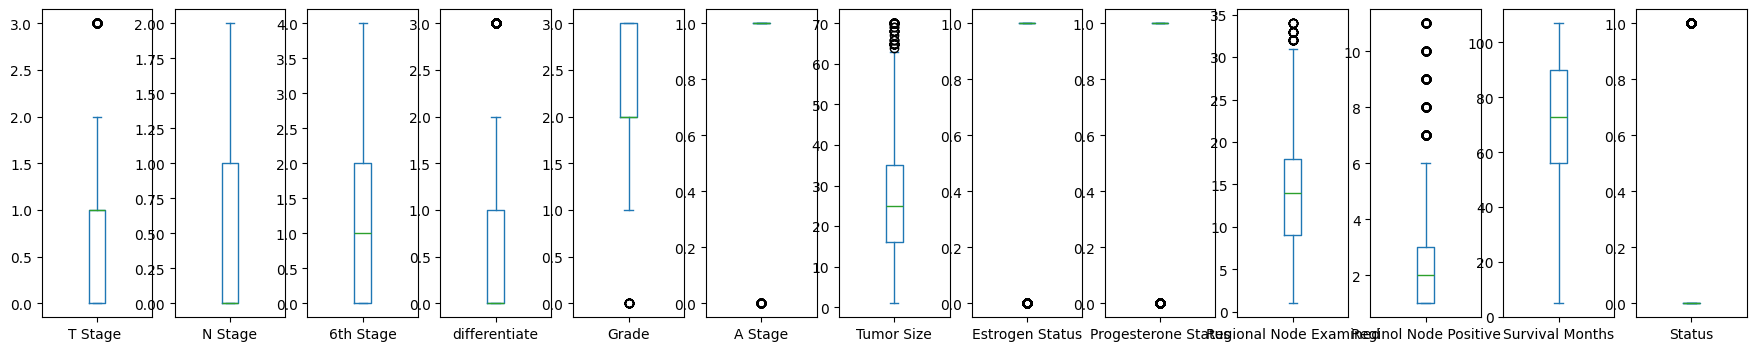

In [149]:
dataset.plot.box(figsize=(22,4),subplots=True);

In [150]:
#splitting the data into features and labels

In [151]:
featurecolumns=['T Stage ','N Stage','6th Stage','differentiate','Grade','A Stage','Tumor Size','Estrogen Status','Progesterone Status','Regional Node Examined','Reginol Node Positive','Survival Months']

In [152]:
x=dataset[featurecolumns].values

In [153]:
y=dataset['Status'].values

In [154]:
#standard scaling

In [155]:
Scale= StandardScaler()
x=Scale.fit_transform(x)

In [156]:
#to view the scaled data as a dataframe

In [158]:
scaled_dataframe=pd.DataFrame(x,columns=featurecolumns)
scaled_dataframe['Status']=dataset['Status']
scaled_dataframe.head(10)


,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,-1.025548,-0.632319,-1.043977,0.304489,1.351595,0.152983,-1.557716,0.267688,0.458176,1.407729,-0.756134,-0.517038,0.0
1,0.280905,0.809756,0.535237,-0.679414,-0.205080,0.152983,0.558764,0.267688,0.458176,0.017861,0.925186,-0.427999,0.0
2,1.587359,2.251832,2.114452,-0.679414,-0.205080,0.152983,2.470423,0.267688,0.458176,0.017861,1.765846,0.150756,0.0
3,-1.025548,-0.632319,-1.043977,0.304489,1.351595,0.152983,-0.601886,0.267688,0.458176,-1.649980,-0.756134,0.551432,0.0
4,0.280905,-0.632319,-0.254370,0.304489,1.351595,0.152983,0.968405,0.267688,0.458176,-1.510994,-0.756134,-0.962235,0.0
5,-1.025548,-0.632319,-1.043977,-0.679414,-0.205080,0.152983,-0.465339,0.267688,0.458176,0.573809,-0.335804,0.774030,0.0
6,-1.025548,-0.632319,-1.043977,2.272296,-1.761755,0.152983,-1.284622,0.267688,0.458176,-0.399099,-0.756134,-0.784156,0.0
7,0.280905,-0.632319,-0.254370,-0.679414,-0.205080,0.152983,0.217396,0.267688,0.458176,-0.677073,-0.756134,-2.564941,1.0
8,2.893813,2.251832,2.114452,0.304489,1.351595,0.152983,-0.123972,0.267688,0.458176,0.851782,-0.335804,-0.071842,0.0
9,2.893813,2.251832,2.114452,2.272296,-1.761755,-6.536686,0.353943,0.267688,0.458176,0.990769,-0.335804,0.907589,0.0


In [159]:
# Split the data into training and testing sets

In [160]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [161]:
# Initialize the classifiers

In [162]:
knn = KNeighborsClassifier(n_neighbors=5)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier( n_estimators=10,criterion='entropy')
svc = SVC()

In [163]:
# Train the classifiers

In [164]:
knn.fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
random_forest.fit(x_train, y_train)
svc.fit(x_train, y_train)

SVC()

In [165]:
# Make prediction and evaluate K-Nearest Neighbors

In [166]:
y_pred=knn.predict(x_test)

In [167]:
accuracy_score(y_test,y_pred)

0.8658385093167702

In [168]:
confusion_matrix(y_test,y_pred)

array([[656,  21],
       [ 87,  41]], dtype=int64)

In [169]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       677
           1       0.66      0.32      0.43       128

    accuracy                           0.87       805
   macro avg       0.77      0.64      0.68       805
weighted avg       0.85      0.87      0.85       805



In [170]:
#  Make prediction and evaluate Decision Tree

In [171]:
y_pred=decision_tree.predict(x_test)

In [172]:
accuracy_score(y_test,y_pred)

0.8149068322981367

In [173]:
confusion_matrix(y_test,y_pred)

array([[595,  82],
       [ 67,  61]], dtype=int64)

In [174]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       677
           1       0.43      0.48      0.45       128

    accuracy                           0.81       805
   macro avg       0.66      0.68      0.67       805
weighted avg       0.82      0.81      0.82       805



In [175]:
# Make prediction and evaluate Random Forest

In [176]:
y_pred=random_forest.predict(x_test)

In [177]:
accuracy_score(y_test,y_pred)

0.8857142857142857

In [178]:
confusion_matrix(y_test,y_pred)

array([[656,  21],
       [ 71,  57]], dtype=int64)

In [179]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       677
           1       0.73      0.45      0.55       128

    accuracy                           0.89       805
   macro avg       0.82      0.71      0.74       805
weighted avg       0.88      0.89      0.87       805



In [180]:
# Make prediction and evaluate Support Vector Classifier

In [181]:
y_pred=svc.predict(x_test)

In [182]:
accuracy_score(y_test,y_pred)

0.8782608695652174

In [183]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[664,  85],
       [ 13,  43]], dtype=int64)

In [184]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       749
           1       0.34      0.77      0.47        56

    accuracy                           0.88       805
   macro avg       0.66      0.83      0.70       805
weighted avg       0.94      0.88      0.90       805



### Random Forest makes the most accuracy

In [185]:
# testing the Random Forest Classifier Model


In [186]:
dataset.sample(5)

,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
1787,0,1,2,3,1,1,18.0,1,1,10.0,7.0,105.0,0
839,1,0,1,0,2,1,25.0,1,1,15.0,2.0,69.0,0
3042,1,0,1,0,2,1,21.0,1,1,6.0,1.0,78.0,0
1444,0,0,0,3,1,1,10.0,1,1,3.0,2.0,5.0,0
2102,1,1,2,3,1,1,40.0,1,1,9.0,4.0,76.0,0


In [187]:
random_forest.predict([[-1.025548,-0.632319,-1.043977,0.304489,1.351595,0.152983,-1.253728,0.267688,0.458176,1.190429,-0.618278,-0.493093]])

array([0])

In [188]:
random_forest.predict([[-1.025548,0.809756,0.535237,-0.679414,-0.205080,0.152983,-0.969618,0.267688,0.458176,-0.167724,0.360370,1.121207]])

array([0])

In [189]:
random_forest.predict([[0.280905,-0.632319,-0.254370,0.304489,1.351595,0.152983,-0.397066,0.267688,0.458176,0.156848,0.084526,0.684991]])

array([1])

In [190]:
dataset.columns

Index(['T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage',
       'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',
       'Status'],
      dtype='object')

In [191]:
dataset.Grade.unique()

array([3, 2, 1, 0])

In [192]:
dataset.differentiate.unique()

array([1, 0, 3, 2])

In [193]:
dataset.head(1)

,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,0,0,0,1,3,1,4.0,1,1,24.0,1.0,60.0,0


In [107]:
    TStage = input("Enter the T stage of the cancer: ")
    T_Stage =le1.transform([TStage])
    T_Stage_value = T_Stage[0]

    NStage = input("Enter the N stage of the cancer: ")
    N_Stage =le2.transform([NStage])
    N_Stage_value=N_Stage[0]

    SixthStage = input("Enter the 6th edition stage of the cancer: ")
    Sixth_Stage =le3.transform([SixthStage])
    Sixth_Stage_value= Sixth_Stage[0]

    Differentiate = input("Enter the differentiation grade of the cancer: ")
    Differentiated =le4.transform([Differentiate])
    Differentiated_value=Differentiated[0]

    Grade = input("Enter the grade of the cancer: ")
    Graded =le5.transform([Grade])
    Graded_value=Graded[0]

    AStage = input("Enter the A stage of the cancer: ")
    A_Stage =le6.transform([AStage])
    A_Stage_value=A_Stage[0]

    TumorSize = int(input("Enter the size of the tumor (in cm): "))
    
    EstrogenStatus = input("Enter the estrogen status (positive/negative): ")
    Estrogen_Status =le7.transform([EstrogenStatus])
    Estrogen_Status_value=Estrogen_Status[0]

    ProgesteroneStatus =input("Enter the progesterone status (positive/negative): ")
    Progesterone_Status =le8.transform([ProgesteroneStatus])
    Progesterone_Status_value=Progesterone_Status[0]

    RegionalNodeExamined = int(input("Enter the number of regional nodes examined: "))
    
    RegionalNodePositive =int(input("Enter the number of regional nodes positive: "))
    
    SurvivalMonths = int(input("Enter the number of survival months: "))
   

    

Enter the T stage of the cancer:  T1
Enter the N stage of the cancer:  N1
Enter the 6th edition stage of the cancer:  IIA
Enter the differentiation grade of the cancer:  Moderately differentiated
Enter the grade of the cancer:  2
Enter the A stage of the cancer:  Regional
Enter the size of the tumor (in cm):  17
Enter the estrogen status (positive/negative):  Positive
Enter the progesterone status (positive/negative):  Positive
Enter the number of regional nodes examined:  16
Enter the number of regional nodes positive:  1
Enter the number of survival months:  14


In [108]:
input_features=[T_Stage_value,N_Stage_value,Sixth_Stage_value,Differentiated_value,Graded_value,A_Stage_value,TumorSize,Estrogen_Status_value,Progesterone_Status_value,RegionalNodeExamined,RegionalNodePositive,SurvivalMonths]

In [109]:
input_scaled_features=Scale.transform([input_features])

In [110]:
random_forest.predict(input_scaled_features)

array([1])